#**Titanic Survival Prediction**

**Problem Statement**

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck



1. survival--->	0 = No, 1 = Yes
2. pclass	Ticket class--->	1 = 1st, 2 = 2nd, 3 = 3rd
3. sex--->	Sex	
4. Age--->	Age in years	
5. sibsp--->	# of siblings / spouses aboard the Titanic	
6. parch--->	# of parents / children aboard the Titanic	
7. ticket--->	Ticket number	
8. fare	--->Passenger fare	
9. cabin--->	Cabin number	
10. embarked--->	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

**Download The data from Kaggle Titanic - Machine Learning from Disaster**

In [ ]:
#!pip install opendatasets
import opendatasets
dataset_url = 'https://www.kaggle.com/competitions/titanic/data'
opendatasets.download(dataset_url)


**Importing all dependencies**

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
sns.set()
import pickle
import joblib

In [5]:
#load data with panda
data_path = '/content/titanic/train.csv'
titanic_data = pd.read_csv(data_path)
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# last five rows
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [18]:
#shape of the dataset
titanic_data.shape

(891, 12)

In [10]:
 #columns name
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
# data types
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
#information about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [61]:
# numerical columns
numerical_columns = list(titanic_data.select_dtypes(['int64','float64']).columns)
numerical_columns

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [62]:
#categorical_columns
categorical_columns = list(titanic_data.select_dtypes('object'))
categorical_columns

['Name', 'Sex', 'Ticket', 'Embarked']

In [13]:
#numerical columns statistics about the data
titanic_data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
# categorical columns statistics about the data
titanic_data.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [47]:
#missing values
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [49]:
#impute age missing values with mean
age_mean = titanic_data['Age'].mean()
titanic_data['Age'].fillna(age_mean,inplace=True)


In [57]:
#impute embarked column with mode
embarked_mode = titanic_data['Embarked'].mode()[0]
titanic_data['Embarked'].fillna(embarked_mode,inplace=True)


In [55]:
#drop cabin column
titanic_data = titanic_data.drop('Cabin',axis=1)


In [58]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Data Visualization**

In [20]:
#target column
survival = titanic_data['Survived'].value_counts()
survival

0    549
1    342
Name: Survived, dtype: int64

In [30]:
survival.values
total_sum  = np.sum(survival.values)
survivors_percentage =round((survival[1]/total_sum)*100,2)
non_survival_percentage =round((survival[0]/total_sum)*100,2)
non_survival_percentage
print(f'Percentage of people who survived: {survivors_percentage}%')
print(f'Percentage of people who did not survived: {non_survival_percentage}%')


Percentage of people who survived: 38.38%
Percentage of people who did not survived: 61.62%


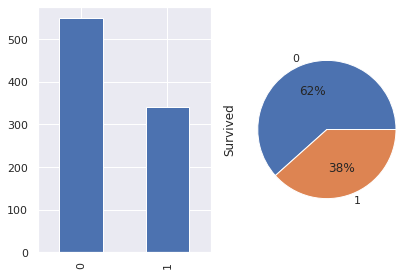

In [38]:
plt.subplot(1,2,1),survival.plot(kind='bar'),plt.tight_layout()
plt.subplot(1,2,2),survival.plot(kind='pie',autopct='%.f%%'),plt.tight_layout()
plt.show()




**549 people did not survived**

**342 people survived**

In [59]:
numerical_columns

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [60]:
categorical_columns

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [41]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**DATA ANALYSIS**

In [81]:
column1 = ['Age','Fare']#histplot,violinplot,boxplot,kdeplot
column2 = ['Survived', 'Pclass', 'SibSp', 'Parch','Sex','Embarked']
#distplot,pie 

In [79]:
def column1_plots(df,columns,plot_kind):
  plot_function = {
      'violin':sns.violinplot,
      'box':sns.boxplot,
      'histogram':sns.histplot,
      'kde':sns.kdeplot
        }
  fig = plt.figure(figsize=(8,4))
  for index,column in enumerate(columns):
    axis = fig.add_subplot(1,2,index+1)
    if plot_kind in ['violin','boxplot']:

      plot_function[plot_kind](y=df[column],ax=axis)
      plt.title(f'{plot_kind} plot for {column}')
    else:
      plot_function[plot_kind](df[column],ax=axis)
      plt.title(f'{plot_kind} plot for {column}')

  plt.tight_layout()
  plt.show()


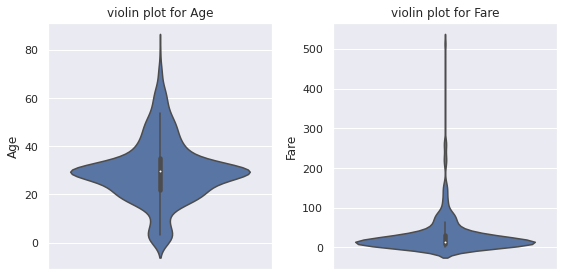

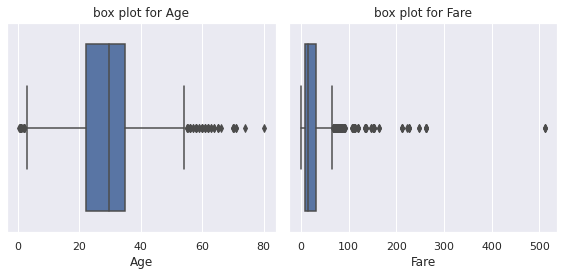

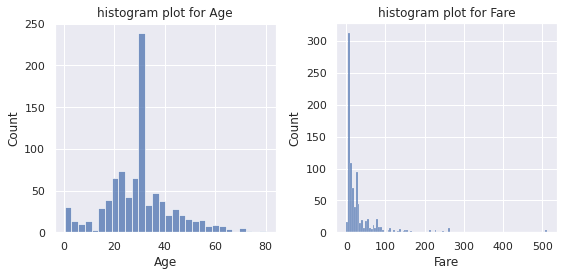

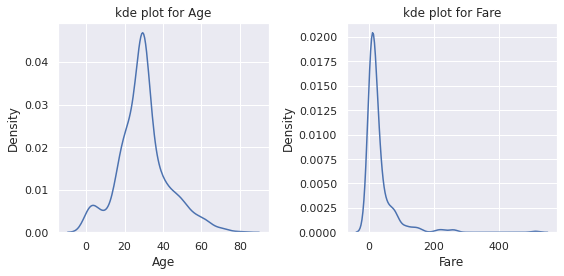

In [80]:
plot_kind = ['violin','box','histogram','kde']
for plot in plot_kind:
  column1_plots(titanic_data,column1,plot)
  print(' ')

In [102]:
column2 = ['Survived', 'Pclass', 'SibSp', 'Parch','Sex','Embarked']

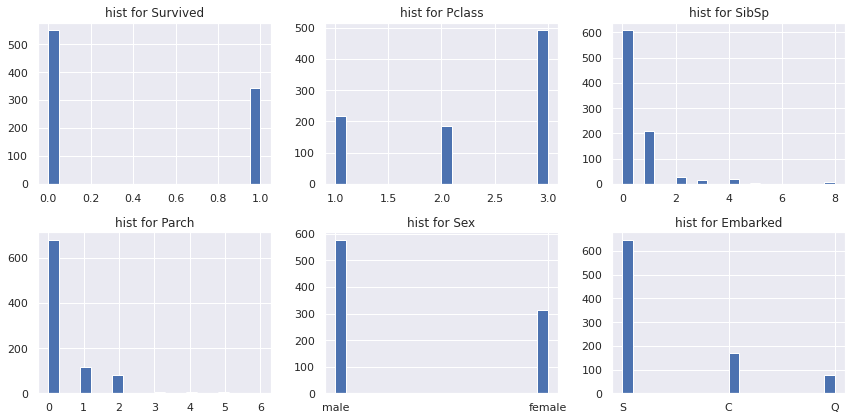

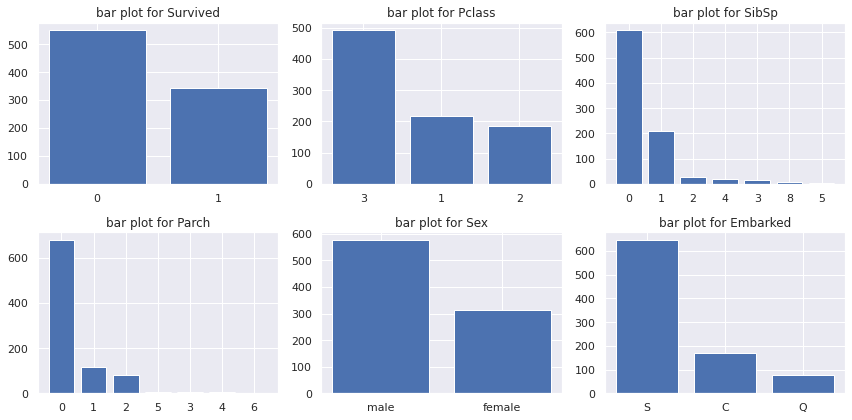

In [106]:


def column2_plot(df,plot_kind,columns):
  plot_function = {
      'hist': plt.hist,
      'bar': plt.bar
  }
  fig = plt.figure(figsize=(12,6))
  for index,column in enumerate(columns):
    axis = fig.add_subplot(2,3,index+1)
    if plot_kind == 'hist':
      plot_function[plot_kind](df[column], bins=20)
      plt.title(f'{plot_kind} for {column}')
    else:
      data = df[column].value_counts()
      labels = data.index
      x = np.arange(len(labels))
      plot_function[plot_kind](x, height=data, tick_label=labels)
      plt.title(f'{plot_kind} plot for {column}')
  plt.tight_layout()
  plt.show()

column2_plot(titanic_data,'hist',column2)
column2_plot(titanic_data,'bar',column2)


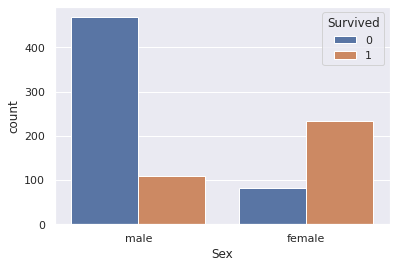

In [126]:
#gender who survived
sns.countplot(x='Sex',hue='Survived',data=titanic_data)
plt.show()

**many male passengers died and few survived as compared to female**

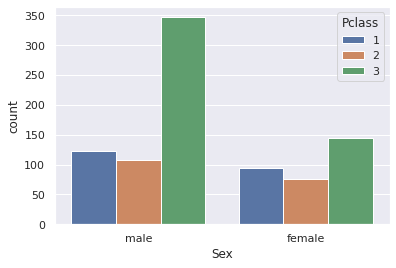

In [127]:
#gender and classes
sns.countplot(x='Sex',hue='Pclass',data=titanic_data)
plt.show()

**Majority of male were in third class**

**Data Preprocessing**

**Encoding categorical columns**

In [130]:
column_to_encode = ['Sex','Embarked']
titanic_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [ ]:
titanic_data.head()

In [132]:
#seperate features and target
features = titanic_data.drop(columns =['PassengerId','Name','Ticket','Survived'],axis=1)
target = titanic_data['Survived']

In [133]:
features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [137]:
#split the data into training, testing data
train_data,test_data,train_labels,test_labels = train_test_split(features,target,stratify=target,test_size=0.2,random_state=2)

**Min Max Scalling**

In [147]:
scaler = MinMaxScaler()
scaler.fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

**Modeling**

**Accuracy on training data**

**Base model: LogisticRegression**

In [151]:

log_model = LogisticRegression()
log_model.fit(train_scaled,train_labels)
train_prediction = log_model.predict(train_scaled)
train_accuracy = accuracy_score(train_prediction,train_labels)
train_answer = round(train_accuracy*100,2)
print(f'Accuracy on training data is: {train_answer}%')

Accuracy on training data is: 79.49%


**Accuracy on test data**

In [152]:
test_prediction = log_model.predict(test_scaled)
test_accuracy = accuracy_score(test_prediction,test_labels)
test_answer = round(test_accuracy*100,2)
print(f'Accuracy on testing data is: {test_answer}%')

Accuracy on testing data is: 79.89%


**Confusion Matrix**

In [158]:
test_confusionmatrix = confusion_matrix(test_prediction,test_labels)
test_confusionmatrix

array([[94, 20],
       [16, 49]])

**Heatmap for sns**

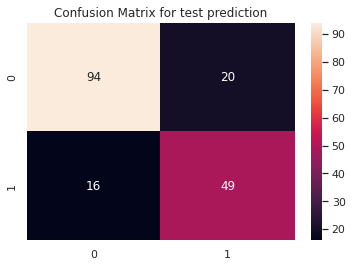

In [161]:
sns.heatmap(test_confusionmatrix,annot=True)
plt.title('Confusion Matrix for test prediction')
plt.show()

**Try with different models**

In [194]:
models = [LogisticRegression(max_iter=1000),SVC(kernel='linear'),RandomForestClassifier(12),KNeighborsClassifier(),XGBClassifier()]
model_results = []

def best_model(models):
  for model in models:
    model.fit(train_scaled,train_labels)
    prediction = model.predict(test_scaled)
    accuracy = accuracy_score(prediction,test_labels)
    formatted_answer = round(accuracy*100,2)
    model_results.append({
        'Name':str(model),
        'Accuracy':formatted_answer
    })
  return pd.DataFrame(model_results).sort_values(by='Accuracy',ascending=False)


best_model(models)

,Name,Accuracy
2,RandomForestClassifier(n_estimators=12),83.24
4,XGBClassifier(),83.24
3,KNeighborsClassifier(),82.68
0,LogisticRegression(max_iter=1000),79.89
1,SVC(kernel='linear'),77.65


**Elbow Method for SVC and Randomforest**

In [202]:
scores = []

for i in range(1,150):
  rf = RandomForestClassifier(n_estimators=i,random_state=43)
  rf.fit(train_scaled,train_labels)
  prediction = rf.predict(test_scaled)
  accuracy = accuracy_score(prediction,test_labels)
  scores.append(accuracy)


In [203]:
np.max(scores)

0.8435754189944135

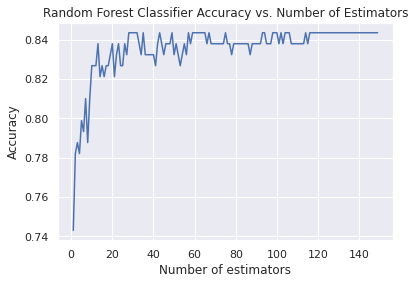

In [205]:
plt.plot(range(1,150),scores)
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.title("Random Forest Classifier Accuracy vs. Number of Estimators")
plt.show()

0.8268156424581006

In [207]:
new_model = RandomForestClassifier(12)
new_model.fit(train_scaled,train_labels)
new_prediction = rf.predict(test_scaled)
new_accuracy = accuracy_score(prediction,test_labels)
new_accuracy

0.8435754189944135

In [198]:
confusionmatrix = confusion_matrix(new_prediction,test_labels)
confusionmatrix

array([[97, 15],
       [13, 54]])

**Save model**

In [200]:
#save the model to a file
joblib.dump(new_model,'RandomForestModel.joblib')
#load using loaded_model = joblib.load(model_name)

['RandomForestModel.joblib']

In [201]:
with open('Randomforestmodel.pkl','wb') as file:
  pickle.dump(new_model,file)

#load with
#with open('Randomforestmodel.pkl','rb') as file:
  #load = pickle.load(file)